<a href="https://colab.research.google.com/github/ykato27/mplfinance/blob/main/resample10years.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Resampling 10 Years of Daily Data

---


In [1]:
!pip install --upgrade mplfinance

Requirement already up-to-date: mplfinance in /usr/local/lib/python3.7/dist-packages (0.12.7a17)


In [2]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%matplotlib inline
import pandas as pd

In [4]:
import pandas_datareader as pdr
symbols = ['INTC']
pdr = pdr.stooq.StooqDailyReader(symbols=symbols, start="1995-5-1", end="2004-4-12").read().sort_values(by='Date',ascending=True)
df = pdr[['Open','High','Low','Close','Volume']]
columns_list = df.columns.get_level_values(0)
df.columns = columns_list
df.shape
df.head(3)
df.tail(3)

(2253, 5)

Attributes,Open,High,Low,Close,Volume
Date,,,,,
1995-05-01,4.7654,4.8397,4.7358,4.7951,156547143
1995-05-02,4.7803,4.8103,4.7432,4.7878,156179577
1995-05-03,4.7878,4.9579,4.7878,4.9432,121362252


Attributes,Open,High,Low,Close,Volume
Date,,,,,
2004-04-07,20.772,20.817,20.332,20.439,98198148
2004-04-08,20.748,20.823,20.127,20.255,97013389
2004-04-12,20.497,20.550,20.153,20.423,68942393


---

#### We can, of course, plot a basic ohlc or candlestick plot:

'0.12.7a17'

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


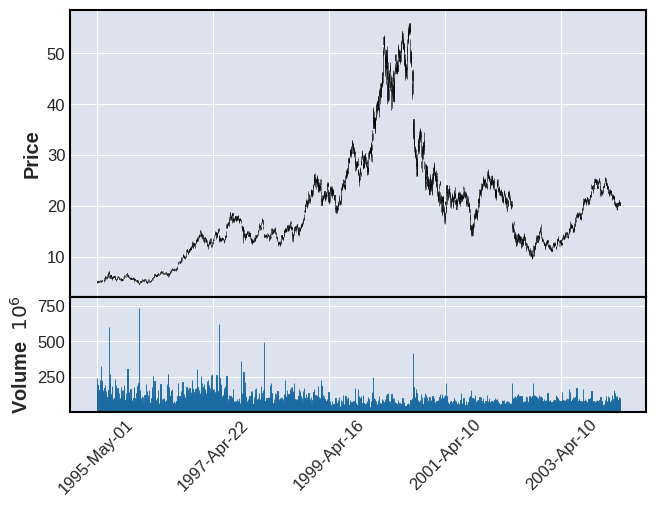

In [5]:
import mplfinance as mpf
mpf.__version__
mpf.plot(df,volume=True,type='candle')

In [6]:
aggregation = {'Open'  :'first',
               'High'  :'max',
               'Low'   :'min',
               'Close' :'last',
               'Volume':'sum'}
dfw = df.resample('1W').agg(aggregation)
dfm = df.resample('1M').agg(aggregation)
dfq = df.resample('1Q').agg(aggregation)

/usr/local/lib/python3.7/dist-packages/mplfinance/_arg_validators.py:45: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  category=UserWarning)


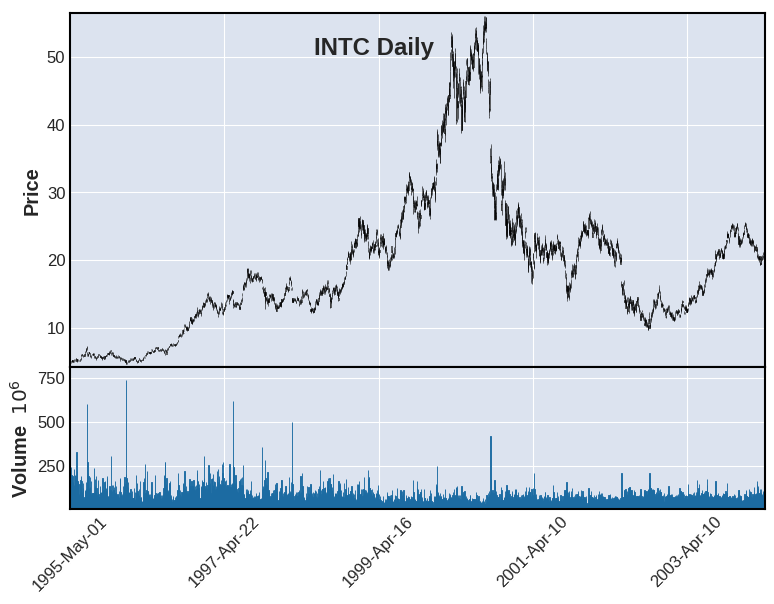

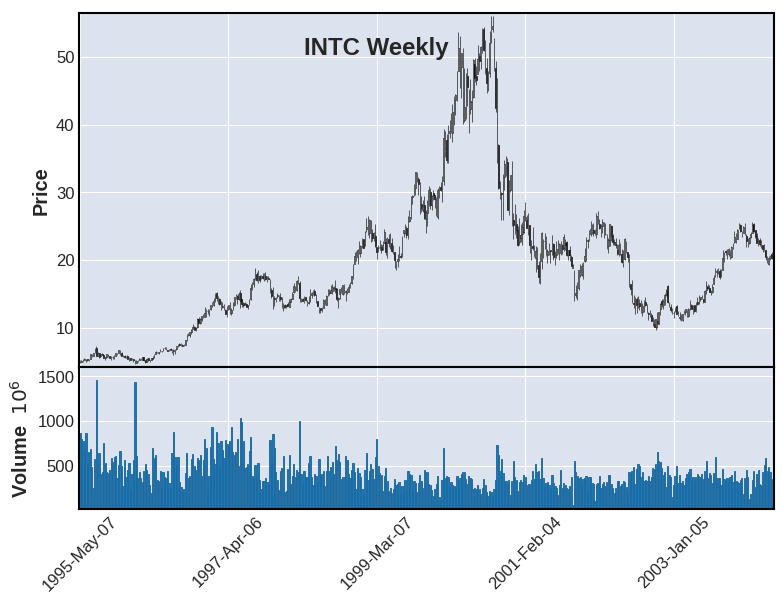

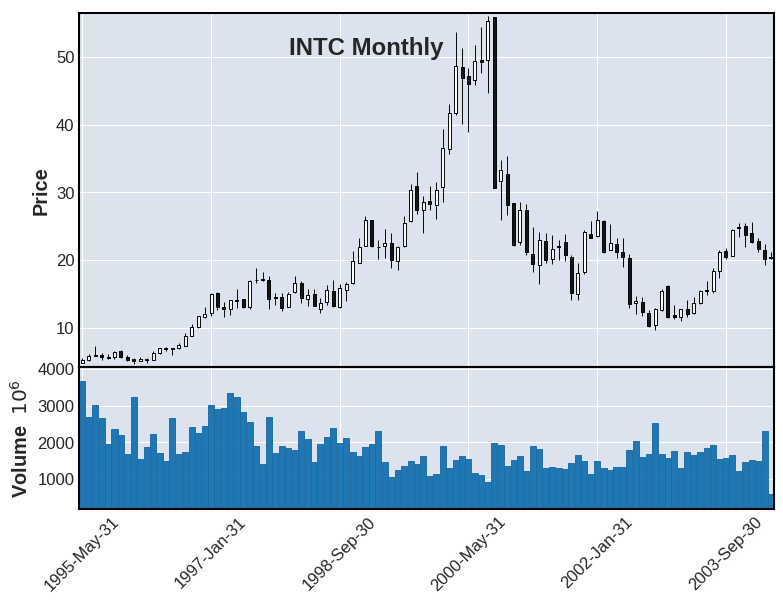

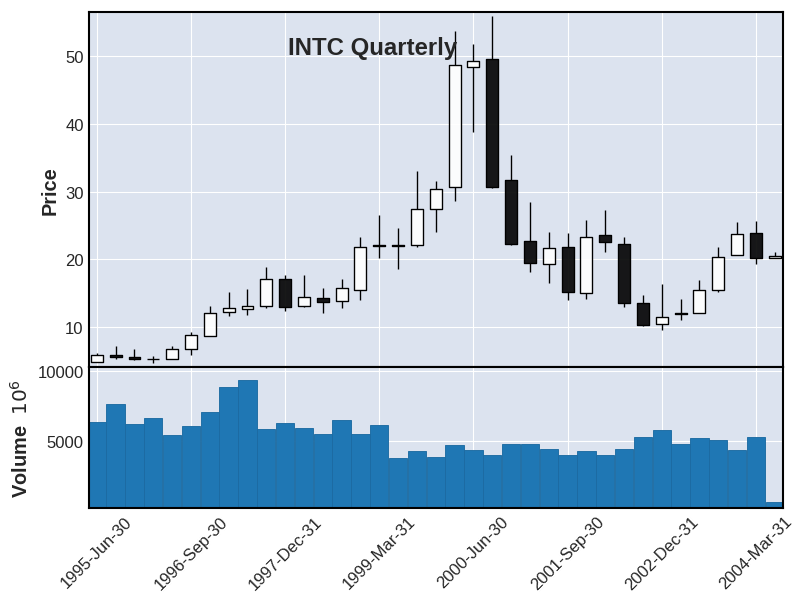

In [7]:
kwargs=dict(volume=True,type='candle',tight_layout=True)
mpf.plot(df,**kwargs,title='\nINTC Daily   ')
mpf.plot(dfw,**kwargs,title='\nINTC Weekly     ')
mpf.plot(dfm,**kwargs,title='\nINTC Monthly        ')
mpf.plot(dfq,**kwargs,title='\nINTC Quarterly         ')